In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import selenium
from selenium import webdriver
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By # 셀레니움 4.0부터 포함된 함수(필수)
from konlpy.tag import Okt
from collections import Counter
# 워드 클라우드 라이브러리 호출
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
import platform
import PIL

In [2]:
# 검색어 크롤링 후 데이터프레임 만드는 함수
def news_crwaling(search_words):
    # 빈 리스트 생성
    news_title=[]
    
    for search_word in search_words:
        # driver 실행
        driver = webdriver.Chrome('./driver/chromedirver.exe')
        # 웹사이트 접속
        driver.get('https://news.google.com/home?hl=ko&gl=KR&ceid=KR:ko')
        driver.implicitly_wait(10) # 10초 대기
        # 검색창 선택 후 선택
        search = driver.find_element(By.CSS_SELECTOR,'#gb > div.gb_Bd.gb_Rd.gb_Id > div.gb_Ad.gb_Ld.gb_we.gb_te.gb_ze > div.gb_ve > form > div.gb_jf > div > div > div > div > div.d1dlne > input.Ax4B8.ZAGvjd')
        search.click()

        # 검색어 입력
        search.send_keys(search_word)
        # 엔터키 전송
        search.send_keys(Keys.ENTER)

        # 뉴스기사 제목 추출 
        news = driver.find_elements(By.CSS_SELECTOR,'#yDmH0d > c-wiz > div > div.FVeGwb.CVnAc.Haq2Hf.bWfURe > div.ajwQHc.BL5WZb.RELBvb > div > main > c-wiz > div.lBwEZb.BL5WZb.GndZbb > div > div > article')

        for i in news:
            news_title.append(i.find_element(By.CSS_SELECTOR,'h3').text)

        news_df = pd.DataFrame({'제목':news_title})

        driver.close()

    return news_df

In [3]:
search_words = ['콘솔시장 전망','콘솔게임']
news_crwaling(search_words)

C:\Users\thddu\AppData\Local\Temp\ipykernel_8068\4094156694.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedirver.exe')


,제목
0,글로벌 게임 콘솔 시장: 경쟁 역학 및 글로벌 전망 2030 – 파이에듀뉴스
1,[주간현대] 연간 수출 10조 원…세계로 뻗는 K-게임
2,대세 꿈꾸는 '콘솔'… 대작 기대에도 갈 길 멀다
3,2030년까지 기하급수적인 성장을 목격할 스마트폰 콘솔 시장 | 상위 ...
4,"크래프톤 1Q 영업익 2830억, 시장 전망 '깜짝' 상회"
...,...
195,"해외 시장 공략할 미래 먹거리, 지스타 대세는 콘솔 게임 - 조선비즈"
196,"亞맹주 게임업계 글로벌行..""69조 콘솔에 달렸다"""
197,포스포큰-데드스페이스...설 이후 AAA급 콘솔 신작 쏟아진다
198,콘솔·판호부터 확률형 아이템·블록체인 게임까지...계묘년 게임업계 주요 이슈는?


In [6]:
# 검색어를 활용한 워드크라우드 만드는 함수
def making_wordcloud(search_words):
    news_df = news_crwaling(search_words)

    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(news_df['제목'].to_string())
    count = Counter(nouns)
    
    # 한 글자 키워드를 제거합니다.
    count = Counter({x : count[x] for x in count if len(x) > 1})
    
    # 워드 클라우드에 필요한 글꼴 지정
    if platform.system() == 'Windows':   #윈도우의    경우 
        font_path = "c:/Windows/Fonts/malgun.ttf"
    elif platform.system() == "Darwin":   #Mac 의 경우
        font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"
    
    # 워드 크라우드 mask 이미지 설정
    icon = PIL.Image.open('./data/cloud.png').convert("RGBA")

    img = PIL.Image.new('RGB', icon.size, (255,255,255))
    img.paste(icon, icon)
    img = np.array(img)
    
    #워드 클라우드 만들기
    wordcloud=WordCloud(font_path= font_path, background_color="white",  
                    max_words=100, relative_scaling= 0.3, 
                    width = 800, height = 400, mask=img
                   ).generate_from_frequencies(count)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')

C:\Users\thddu\AppData\Local\Temp\ipykernel_8068\4094156694.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedirver.exe')


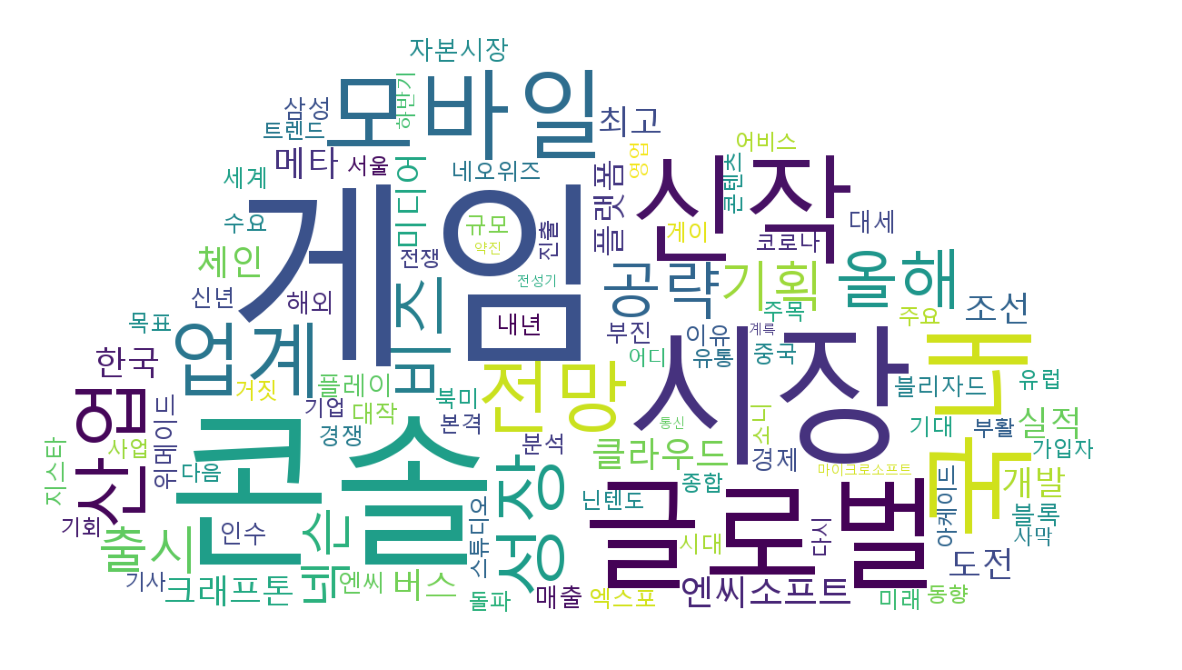

In [7]:
search_words = ['콘솔시장 전망','콘솔게임','콘솔게임 수요','콘솔게임 현황']
making_wordcloud(search_words)